In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.stats import norm

In [2]:
google = yf.Ticker("AAPL")

In [3]:
google_data = google.history(period="1y")

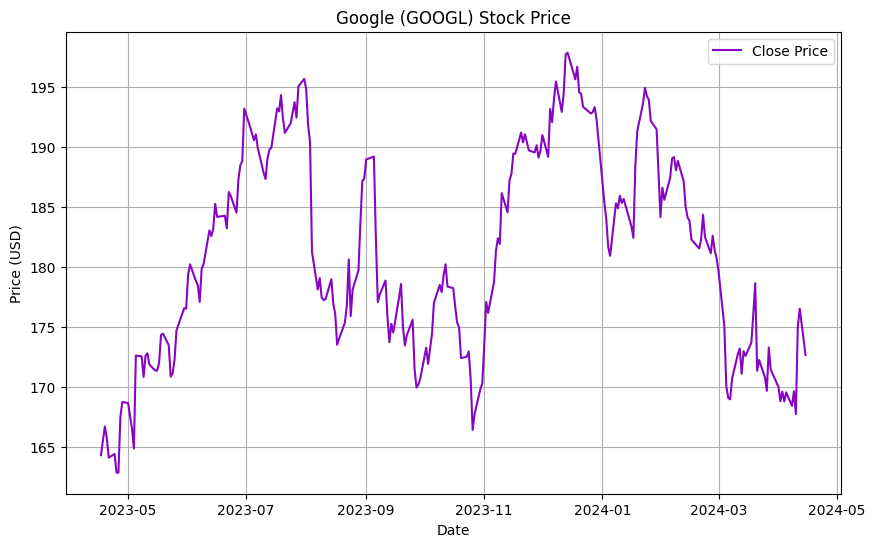

In [4]:
plt.figure(figsize=(10, 6))
plt.plot(google_data['Close'], label='Close Price', color='#8606c2')
plt.title('Google (GOOGL) Stock Price')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

In [5]:
close_price = google_data['Close']

In [6]:
close_price.shift(1)

Date
2023-04-17 00:00:00-04:00           NaN
2023-04-18 00:00:00-04:00    164.352737
2023-04-19 00:00:00-04:00    165.586151
2023-04-20 00:00:00-04:00    166.740005
2023-04-21 00:00:00-04:00    165.765182
                                ...    
2024-04-09 00:00:00-04:00    168.449997
2024-04-10 00:00:00-04:00    169.669998
2024-04-11 00:00:00-04:00    167.779999
2024-04-12 00:00:00-04:00    175.039993
2024-04-15 00:00:00-04:00    176.550003
Name: Close, Length: 251, dtype: float64

In [7]:
returns = ((close_price - close_price.shift(1)) / close_price.shift(1)).dropna()
annual_volatility = np.std(returns) * np.sqrt(252)

print(f'Annual Volatility : {annual_volatility}')

Annual Volatility : 0.19554860845061442


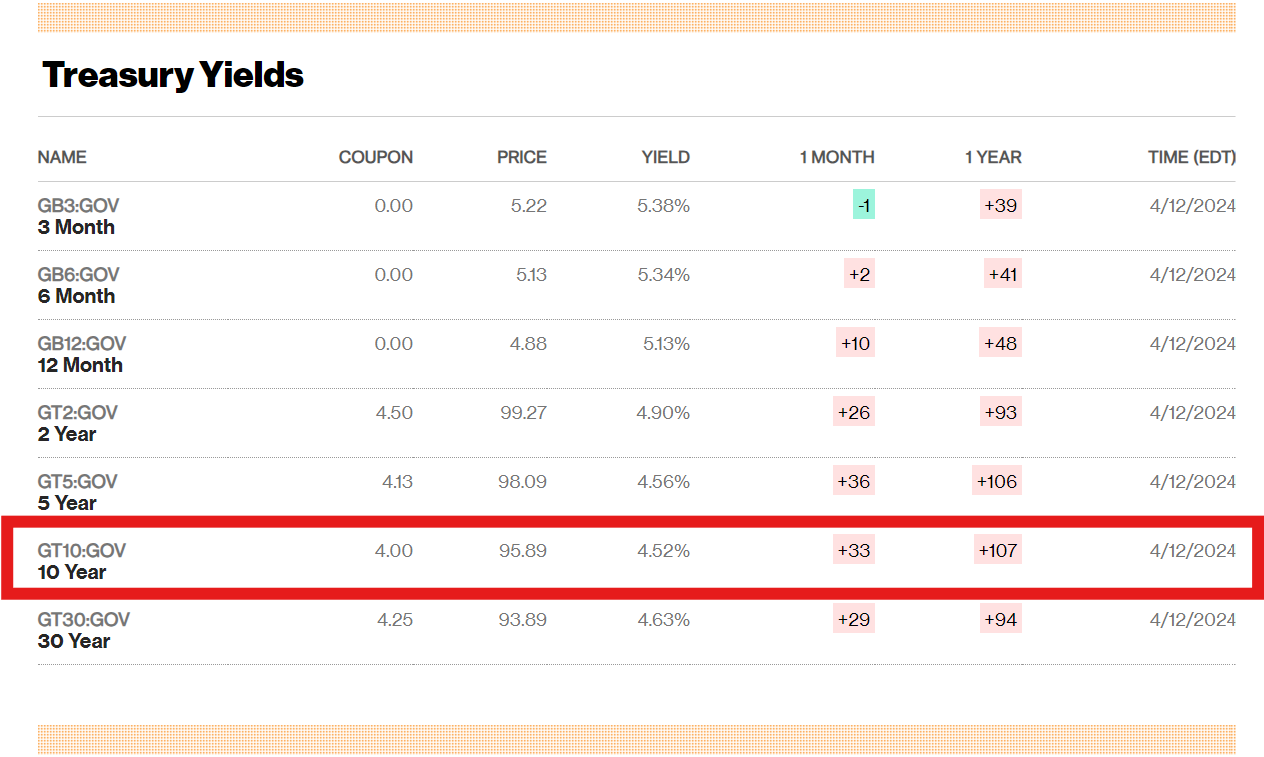

In [8]:
rate_of_interest = 4.52 / 100

In [9]:
def put_call_parity(C0, K, T, r, S0):
    P0 = C0 - S0 + K * np.exp(-r * T)
    return P0

In [10]:
def binomial_option_pricing(S0, K, T, r, σ, n, option_type):
    """
    Calculates the option price using the binomial option pricing model.
    -----------------
    
    Args:
        S0 (float): Current stock price
        K (float): Strike price
        T (float): Time to maturity in years
        r (float): Risk-free interest rate
        σ (float): Annual volatility of the underlying asset
        n (int): Number of time steps
        option_type (str): 'call' or 'put'
        
    Returns:
        float: Option price
    """
    
    Δt = T / n
    u = math.exp(σ * math.sqrt(Δt))
    d = 1 / u
    p = (math.exp(r * Δt) - d) / (u - d)
    
    option_price = 0
    
    for j in range(0, n + 1):
        price_component = S0 * (u ** j) * (d ** (n - j)) - K
        prob_component = math.comb(n, j) * (p ** j) * ((1 - p) ** (n - j))
     
        if option_type == 'call':
            price = prob_component * max(0, price_component)
        elif option_type == 'put':
            price = prob_component * max(0, -price_component)
        
        option_price += price
        
    option_price = math.exp(-r * T) * option_price
    return option_price

In [11]:
S0 = google_data['Close'][0]  # Current stock price
σ = annual_volatility  # Annual volatility
r = rate_of_interest  # Interest rate
n = 2 # Number of time steps
T = 1
K = 100

call_option_price = binomial_option_pricing(S0, K, T, r, σ, n, 'call')
print(f'Call option price using binomial model : {call_option_price}')

Call option price using binomial model : 68.772107281217


In [12]:
put_option_price = binomial_option_pricing(S0, K, T, r, σ, n, 'put')
print(f'Put option price using binomial model : {put_option_price}')

Put option price using binomial model : 0.0


In [13]:
C0, K, T, r, S0 = call_option_price, K, T, r, S0
put_option_price = put_call_parity(C0, K, T, r, S0)
print(f'Put option price using put call parity : {put_option_price}')

Put option price using put call parity : 2.842170943040401e-14


In [14]:
def black_scholes_formula(S0, K, T, r, σ, option_type):
    """
    Calculates the option price using the black scholes formula.
    -----------------
    
    Args:
        S0 (float): Current stock price
        K (float): Strike price
        T (float): Time to maturity in years
        r (float): Risk-free interest rate
        σ (float): Annual volatility of the underlying asset
        option_type (str): 'call' or 'put'
        
    Returns:
        float: Option price
    """
    d1 = (math.log(S0 / K) + (r + (σ ** 2) / 2) * T) / (σ * math.sqrt(T))
    d2 = d1 - σ * math.sqrt(T)
    
    N_d1 = norm.cdf(d1)
    N_d2 = norm.cdf(d2)
    
    C0 = S0 * N_d1 - K * math.exp(-r * T) * N_d2
    if option_type == 'call':
        return C0
    elif option_type == 'put':
        P0 = put_call_parity(C0, K, T, r, S0)
        return P0

In [15]:
S0 = google_data['Close'][0]  # Current stock price
σ = annual_volatility  # Annual volatility
r = rate_of_interest  # Interest rate
T = 1
K = 100

call_option_price = black_scholes_formula(S0, K, T, r, σ, 'call')
print(f'Call option price using black scholes formula : {call_option_price}')

Call option price using black scholes formula : 68.79251475301487


In [16]:
put_option_price = black_scholes_formula(S0, K, T, r, σ, 'put')
print(f'Put option price using black scholes formula : {put_option_price}')

Put option price using black scholes formula : 0.020407471797895482


In [17]:
K_vals = S0 + np.arange(-20, 20)
T_vals = [num_months * (1 / 12) for num_months in range(1, 13, 4)]

   # Current stock price
σ = annual_volatility  # Annual volatility
r = rate_of_interest  # Interest rate
n = 2

for K in K_vals:
    print(f'For K = {K}')
    for T in T_vals:
        call_option_price = binomial_option_pricing(S0, K, T, r, σ, n, 'call')
        print(f'T = {int(T * 12)} month(s) : Call Option price is {call_option_price}')

For K = 144.3527374267578
T = 1 month(s) : Call Option price is 20.54270590653439
T = 5 month(s) : Call Option price is 24.17829814562267
T = 9 month(s) : Call Option price is 27.863030049329673
For K = 145.3527374267578
T = 1 month(s) : Call Option price is 19.546465488210558
T = 5 month(s) : Call Option price is 23.413152104699915
T = 9 month(s) : Call Option price is 27.099750137772308
For K = 146.3527374267578
T = 1 month(s) : Call Option price is 18.55022506988673
T = 5 month(s) : Call Option price is 22.64800606377716
T = 9 month(s) : Call Option price is 26.336470226214942
For K = 147.3527374267578
T = 1 month(s) : Call Option price is 17.553984651562896
T = 5 month(s) : Call Option price is 21.882860022854402
T = 9 month(s) : Call Option price is 25.573190314657573
For K = 148.3527374267578
T = 1 month(s) : Call Option price is 16.557744233239063
T = 5 month(s) : Call Option price is 21.117713981931647
T = 9 month(s) : Call Option price is 24.809910403100204
For K = 149.3527374

In [18]:
K_vals = S0 + np.arange(-20, 20)
T_vals = [num_months * (1 / 12) for num_months in range(1, 13, 4)]

S0 = google_data['Close'][0]   # Current stock price
σ = annual_volatility  # Annual volatility
r = rate_of_interest  # Interest rate
n = 2

for K in K_vals:
    print(f'For K = {K}')
    for T in T_vals:
        put_option_price = binomial_option_pricing(S0, K, T, r, σ, n,'put')
        print(f'T = {int(T * 12)} month(s) : Put Option price is {put_option_price}')

For K = 144.3527374267578
T = 1 month(s) : Put Option price is 0.0
T = 5 month(s) : Put Option price is 1.48509552033701
T = 9 month(s) : Put Option price is 3.051488657616845
For K = 145.3527374267578
T = 1 month(s) : Put Option price is 0.0
T = 5 month(s) : Put Option price is 1.701292385179016
T = 9 month(s) : Put Option price is 3.254876912680467
For K = 146.3527374267578
T = 1 month(s) : Put Option price is 0.0
T = 5 month(s) : Put Option price is 1.9174892500210223
T = 9 month(s) : Put Option price is 3.458265167744089
For K = 147.3527374267578
T = 1 month(s) : Put Option price is 0.0
T = 5 month(s) : Put Option price is 2.133686114863029
T = 9 month(s) : Put Option price is 3.661653422807711
For K = 148.3527374267578
T = 1 month(s) : Put Option price is 0.0
T = 5 month(s) : Put Option price is 2.349882979705035
T = 9 month(s) : Put Option price is 3.865041677871333
For K = 149.3527374267578
T = 1 month(s) : Put Option price is 0.0
T = 5 month(s) : Put Option price is 2.566079844

In [19]:
K_vals = S0 + np.arange(-20, 20)
T_vals = [num_months * (1 / 12) for num_months in range(1, 13, 4)]

S0 = google_data['Close'][0]   # Current stock price
σ = annual_volatility  # Annual volatility
r = rate_of_interest  # Interest rate

for K in K_vals:
    print(f'For K = {K}')
    for T in T_vals:
        call_option_price = black_scholes_formula(S0, K, T, r, σ, 'call')
        print(f'T = {int(T * 12)} month(s) : Put Option price is {call_option_price}')

For K = 144.3527374267578
T = 1 month(s) : Put Option price is 20.568895097375673
T = 5 month(s) : Put Option price is 23.823839310448335
T = 9 month(s) : Put Option price is 27.083539102851816
For K = 145.3527374267578
T = 1 month(s) : Put Option price is 19.584081044788263
T = 5 month(s) : Put Option price is 22.978531337070294
T = 9 month(s) : Put Option price is 26.30494150163713
For K = 146.3527374267578
T = 1 month(s) : Put Option price is 18.60345408809158
T = 5 month(s) : Put Option price is 22.145397603658353
T = 9 month(s) : Put Option price is 25.537343586449197
For K = 147.3527374267578
T = 1 month(s) : Put Option price is 17.62822554907416
T = 5 month(s) : Put Option price is 21.325051913327485
T = 9 month(s) : Put Option price is 24.78103921988695
For K = 148.3527374267578
T = 1 month(s) : Put Option price is 16.65984479214501
T = 5 month(s) : Put Option price is 20.51809538674523
T = 9 month(s) : Put Option price is 24.036309247068345
For K = 149.3527374267578
T = 1 mont

In [20]:
K_vals = S0 + np.arange(-20, 20)
T_vals = [num_months * (1 / 12) for num_months in range(1, 13, 4)]

S0 = google_data['Close'][0]   # Current stock price
σ = annual_volatility  # Annual volatility
r = rate_of_interest  # Interest rate

for K in K_vals:
    print(f'For K = {K}')
    for T in T_vals:
        put_option_price = black_scholes_formula(S0, K, T, r, σ, 'put')
        print(f'T = {int(T * 12)} month(s) : Put Option price is {put_option_price}')

For K = 144.3527374267578
T = 1 month(s) : Put Option price is 0.026189190841279242
T = 5 month(s) : Put Option price is 1.1306366851626422
T = 9 month(s) : Put Option price is 2.271997711139022
For K = 145.3527374267578
T = 1 month(s) : Put Option price is 0.03761555657769122
T = 5 month(s) : Put Option price is 1.2666716175493775
T = 9 month(s) : Put Option price is 2.4600682765453143
For K = 146.3527374267578
T = 1 month(s) : Put Option price is 0.05322901820483139
T = 5 month(s) : Put Option price is 1.4148807899021847
T = 9 month(s) : Put Option price is 2.6591385279783424
For K = 147.3527374267578
T = 1 month(s) : Put Option price is 0.07424089751125962
T = 5 month(s) : Put Option price is 1.5758780053360795
T = 9 month(s) : Put Option price is 2.8695023280371004
For K = 148.3527374267578
T = 1 month(s) : Put Option price is 0.1021005589059314
T = 5 month(s) : Put Option price is 1.7502643845186014
T = 9 month(s) : Put Option price is 3.0914405218394734
For K = 149.3527374267578


In [21]:
S0 = 200  # Current stock price
σ = annual_volatility  # Annual volatility
r = rate_of_interest  # Interest rate
T = 2
K = 220

black_scholes_call_price = black_scholes_formula(S0, K, T, r, σ, 'call')
print(f'Black Scholes Call Option Price : {black_scholes_call_price}')

call_prices = []

for n in range(1, 100):
    call_price = binomial_option_pricing(S0, K, T, r, σ, n, 'call')
    call_prices.append(call_price)

Black Scholes Call Option Price : 21.5605462386778


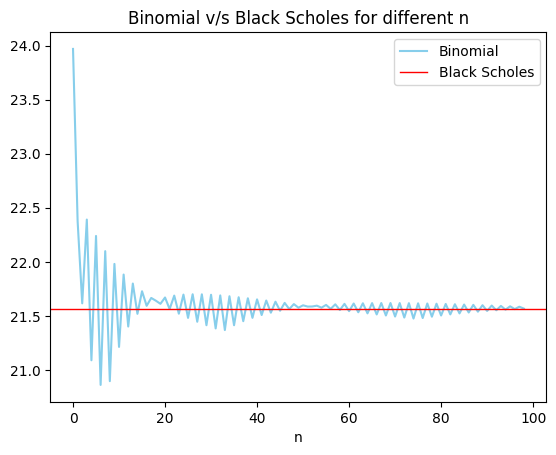

In [22]:
plt.plot(call_prices, label='Binomial', color='skyblue')
plt.axhline(black_scholes_call_price, color='red', label='Black Scholes', linewidth=1)
plt.xlabel('n')

plt.title('Binomial v/s Black Scholes for different n')
plt.legend()
plt.show()

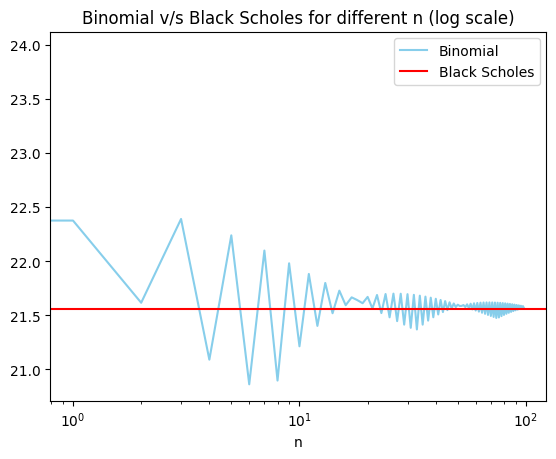

In [23]:
plt.plot(call_prices, label='Binomial', color='skyblue')
plt.axhline(black_scholes_call_price, color='red', label='Black Scholes')
plt.xlabel('n')

plt.legend()
plt.xscale('log')
plt.title('Binomial v/s Black Scholes for different n (log scale)')
plt.show()

In [24]:
ticker_symbol = "AAPL"
options_data = yf.Ticker(ticker_symbol).options
expiry_date = options_data[0]
options_chain = yf.Ticker(ticker_symbol).option_chain(expiry_date)

# Convert options data into Pandas DataFrame
calls_df = pd.DataFrame(options_chain.calls)
puts_df = pd.DataFrame(options_chain.puts)

IndexError: tuple index out of range

In [ ]:


# Convert options data into Pandas DataFrame
calls_df = pd.DataFrame(options_chain.calls)
puts_df = pd.DataFrame(options_chain.puts)

In [ ]:
ticker_symbol = "AAPL"
yf.Ticker(ticker_symbol)